# 얼굴 트랙킹

https://github.com/ageitgey/face_recognition 프로젝트를 사용한다.



# 프로젝트 다운로드

In [1]:
!git clone https://github.com/ageitgey/face_recognition

Cloning into 'face_recognition'...
remote: Enumerating objects: 874, done.
remote: Total 874 (delta 0), reused 0 (delta 0), pack-reused 874
Receiving objects: 100% (874/874), 101.46 MiB | 29.69 MiB/s, done.
Resolving deltas: 100% (506/506), done.


In [2]:
%cd face_recognition

/content/face_recognition


# 필요 라이브러리 설치

In [3]:
!pip install opencv-python

# 데이터 준비

In [11]:
!wget https://github.com/ageitgey/face_recognition/raw/master/examples/hamilton_clip.mp4

--2020-08-24 00:25:51--  https://github.com/ageitgey/face_recognition/raw/master/examples/hamilton_clip.mp4
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ageitgey/face_recognition/master/examples/hamilton_clip.mp4 [following]
--2020-08-24 00:25:52--  https://raw.githubusercontent.com/ageitgey/face_recognition/master/examples/hamilton_clip.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5139784 (4.9M) [application/octet-stream]
Saving to: ‘hamilton_clip.mp4’

hamilton_clip.mp4   100%[===================>]   4.90M  25.5MB/s    in 0.2s    

2020-08-24 00:25:52 (25.5 MB/s) - ‘hamilton_clip.mp4’ sav

# 실행

아래의 코드는 

https://github.com/ageitgey/face_recognition/blob/master/examples/ipynb_examples/track_faces_on_video_realtime.ipynb 그대로

This demo shows how to detect faces from video and displays result in realtime

You need OpenCV installed to run this example. To install it, run ___pip install opencv-python___


In [4]:
!pip install git+https://github.com/ageitgey/face_recognition_models

  Cloning https://github.com/ageitgey/face_recognition_models to /tmp/pip-req-build-zvaf_pca
  Running command git clone -q https://github.com/ageitgey/face_recognition_models /tmp/pip-req-build-zvaf_pca
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=c9fd0a57cb6cd857ee71ad6f7e071406a086e1fbdfe47df71eef5dede288064c
  Stored in directory: /tmp/pip-ephem-wheel-cache-uyhyzgcw/wheels/0e/43/bc/eeadfb1a85c256c03f93bd26b361adc3ff0d2a8e7f1b481a80
Successfully built face-recognition-models


In [7]:
%pylab inline 
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 동영상 얼굴 탐지

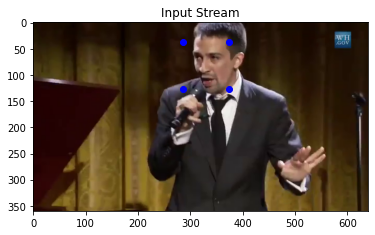

In [18]:
# Loading video for face detection
video_capture = cv2.VideoCapture("hamilton_clip.mp4")

frame_count = 0

while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break
        
    # We will search face in every 15 frames to speed up process.
    frame_count += 1
    if frame_count % 15 == 0:    
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display video frame
        title("Input Stream")
        plt.imshow(frame)        

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)
        
        # If faces were found, we will mark it on frame with blue dots
        for face_location in face_locations:        
            plt.plot(face_location[1], face_location[0], 'bo')
            plt.plot(face_location[1], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[0], 'bo')

        # Show frame...
        plt.show() 
        # ... and hold it until a new frame appears
        clear_output(wait=True)

## 영상 1개에 대해 실행

In [19]:
!wget -O yuna.jpg https://spnimage.edaily.co.kr/images/photo/files/NP/S/2020/02/PS20021800119.jpg

--2020-08-24 00:54:19--  https://spnimage.edaily.co.kr/images/photo/files/NP/S/2020/02/PS20021800119.jpg
Resolving spnimage.edaily.co.kr (spnimage.edaily.co.kr)... 1.248.219.214
Connecting to spnimage.edaily.co.kr (spnimage.edaily.co.kr)|1.248.219.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92532 (90K) [image/jpeg]
Saving to: ‘yuna.jpg’

yuna.jpg            100%[===================>]  90.36K   231KB/s    in 0.4s    

2020-08-24 00:54:20 (231 KB/s) - ‘yuna.jpg’ saved [92532/92532]



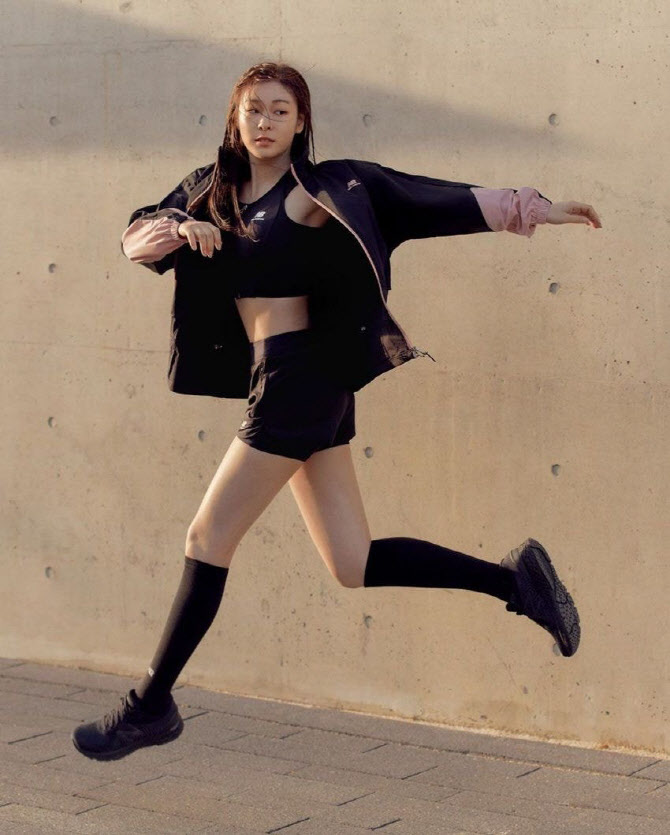

In [28]:
from IPython.display import Image, display
display(Image('yuna.jpg'))

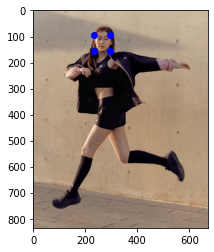

In [26]:
import face_recognition
image = face_recognition.load_image_file("yuna.jpg")
plt.imshow(image)    
face_locations = face_recognition.face_locations(image)

for face_location in face_locations:        
    plt.plot(face_location[1], face_location[0], 'bo')
    plt.plot(face_location[1], face_location[2], 'bo')
    plt.plot(face_location[3], face_location[2], 'bo')
    plt.plot(face_location[3], face_location[0], 'bo')

# Show frame...
plt.show() 
